In [1]:
import os, argparse
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.backends.cudnn as cudnn
import torchvision

import datasets
# from utils import select_device, natural_keys, gazeto3d, angular, getArch
from utils import select_device, natural_keys, gazeto3d, angular
from model import L2CS

In [2]:
def parse_args():
    """Parse input arguments."""
    parser = argparse.ArgumentParser(
        description='Gaze estimation using L2CSNet .')
     # Gaze360
    parser.add_argument(
        '--gaze360image_dir', dest='gaze360image_dir', help='Directory path for gaze images.',
        default='datasets/Gaze360/Image', type=str)
    parser.add_argument(
        '--gaze360label_dir', dest='gaze360label_dir', help='Directory path for gaze labels.',
        default='datasets/Gaze360/Label/test.label', type=str)
    # mpiigaze
    parser.add_argument(
        '--gazeMpiimage_dir', dest='gazeMpiimage_dir', help='Directory path for gaze images.',
        default='datasets/MPIIFaceGaze/Image', type=str)
    parser.add_argument(
        '--gazeMpiilabel_dir', dest='gazeMpiilabel_dir', help='Directory path for gaze labels.',
        default='datasets/MPIIFaceGaze/Label', type=str)
    # Important args -------------------------------------------------------------------------------------------------------
    # ----------------------------------------------------------------------------------------------------------------------
    parser.add_argument(
        '--dataset', dest='dataset', help='gaze360, mpiigaze',
        default= "gaze360", type=str)
    parser.add_argument(
        '--snapshot', dest='snapshot', help='Path to the folder contains models.', 
        default='output/snapshots/L2CS-gaze360-_loader-180-4-lr', type=str)
    parser.add_argument(
        '--evalpath', dest='evalpath', help='path for the output evaluating gaze test.',
        default="evaluation/L2CS-gaze360-_loader-180-4-lr", type=str)
    parser.add_argument(
        '--gpu',dest='gpu_id', help='GPU device id to use [0]',
        default="0", type=str)
    parser.add_argument(
        '--batch_size', dest='batch_size', help='Batch size.',
        default=100, type=int)
    parser.add_argument(
        '--arch', dest='arch', help='Network architecture, can be: ResNet18, ResNet34, [ResNet50], ''ResNet101, ResNet152, Squeezenet_1_0, Squeezenet_1_1, MobileNetV2',
        default='ResNet50', type=str)
    # ---------------------------------------------------------------------------------------------------------------------
    # Important args ------------------------------------------------------------------------------------------------------
    args = parser.parse_args()
    return args

In [3]:
def getArch(arch,bins):
    # Base network structure
    if arch == 'ResNet18':
        model = L2CS( torchvision.models.resnet.BasicBlock,[2, 2,  2, 2], bins)
    elif arch == 'ResNet34':
        model = L2CS( torchvision.models.resnet.BasicBlock,[3, 4,  6, 3], bins)
    elif arch == 'ResNet101':
        model = L2CS( torchvision.models.resnet.Bottleneck,[3, 4, 23, 3], bins)
    elif arch == 'ResNet152':
        model = L2CS( torchvision.models.resnet.Bottleneck,[3, 8, 36, 3], bins)
    else:
        if arch != 'ResNet50':
            print('Invalid value for architecture is passed! '
                'The default value of ResNet50 will be used instead!')
        model = L2CS( torchvision.models.resnet.Bottleneck, [3, 4, 6,  3], bins)
    return model

In [4]:
class Nothing:
    pass
args = Nothing()
args.gazeMpiimage_dir = '/project/data/Image'
args.gazeMpiilabel_dir = '/project/data/Label'
args.output = '/project/results/output/snapshots/'
args.dataset = 'mpiigaze'
args.snapshot='/project/results/output/snapshots/'
args.evalpath = '/project/results/output/evaluation/'
args.gpu_id = '0,1,2,3'
args.gpu_id = '0'
args.batch_size = 20
args.arch = 'ResNet50'
args.bins=28
args.angle = 180
args.bin_width = 4


In [5]:
batch_size=args.batch_size
arch=args.arch
data_set=args.dataset
evalpath =args.evalpath
snapshot_path = args.snapshot
bins=args.bins
angle=args.angle
bin_width=args.bin_width

In [6]:
# args = parse_args()
cudnn.enabled = True
gpu = select_device(args.gpu_id, batch_size=args.batch_size)

transformations = transforms.Compose([
    transforms.Resize(448),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

model_used=getArch(arch, bins)

In [7]:
fold=2
folder = os.listdir(os.path.join(snapshot_path, "fold" + f'{fold:0>2}'))
folder.sort(key=natural_keys)
folder.pop(-1)  #remove the tensorboard file
# print(folder)
epochs = folder[3]
os.path.join(snapshot_path+"fold"+f'{fold:0>2}', epochs)

'/project/results/output/snapshots/fold02/epoch_4.pkl'

In [8]:
print(evalpath, snapshot_path)

/project/results/output/evaluation/ /project/results/output/snapshots/


In [9]:
print(data_set)

mpiigaze


0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold00/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=0---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.277410680716208 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:3.000290458863941 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:2.582823710387727 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:3.7437785875246092 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:2.5471601826323105 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:3.8175829307933653 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:2.733349421296154 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:3.2177011077716955 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:2.6561602577422265 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:3.11834184227299 

[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:3.129305323866173 

[epoch_12.pkl---mpiigaze]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:2.792503214578121 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold01/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=1---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:3.9591494334645905 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.1788900041970285 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:3.672506577068228 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:5.122725672787776 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.180889806217247 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.003542292481656 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:5.086010329606162 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:5.1677128873791975 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:5.105457834014965 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:4.72450335645195 

[epoch_11.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:5.499286443323674 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold02/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=2---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.642829419062778 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.234591419952595 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:6.576831447720724 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:5.174752729973752 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.688670840823343 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:5.299466208549459 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:6.888356349819645 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:7.170891431895595 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:6.4991269477313605 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:5.095394560089755 

[epoch_11.pkl---mpiigaze] To

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:5.263167833757448 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold03/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=3---------------------------------------

[epoch_14.pkl---mpiigaze] Total Num:3000,MAE:2.8592160791797783 

[epoch_15.pkl---mpiigaze] Total Num:3000,MAE:3.2115644801380943 

[epoch_16.pkl---mpiigaze] Total Num:3000,MAE:3.294119738494664 

[epoch_17.pkl---mpiigaze] Total Num:3000,MAE:3.0848053366118995 

[epoch_18.pkl---mpiigaze] Total Num:3000,MAE:2.38253105744082 

[epoch_19.pkl---mpiigaze] Total Num:3000,MAE:3.111765596291997 

[epoch_20.pkl---mpiigaze] Total Num:3000,MAE:2.42984385271877 

[epoch_21.pkl---mpiigaze] Total Num:3000,MAE:3.273050234060077 

[epoch_22.pkl---mpiigaze] Total Num:3000,MAE:2.416286201194461 

[epoch_23.pkl---mpiigaze] Total Num:3000,MAE:3.157147603881526 

[epoch_24.pkl---mpi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:2.8187157357997386 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold04/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=4---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.55777876507232 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:3.0495732777351527 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:2.8540541257546526 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:3.118692747974429 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:2.9774907998602322 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.098082345728854 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:3.300259316977812 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:2.839101891483618 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:2.8978597613736135 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:3.51188590080909 

[epoch_11.pkl---mpiigaze] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:3.797638467036195 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold05/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=5---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.722708464335866 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:5.3491883868417265 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:3.988753437299077 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:4.177779792927015 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:4.215288192135021 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.53042470775537 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:3.8180224448064872 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:3.8993309534573757 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:4.065988741083113 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:3.965661062680359 

[epoch_23.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:4.293103969695289 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold07/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=7---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:5.662746762034363 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.701220262037038 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.2909114036083045 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:4.2323236936846 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.043429310675153 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.747974749925608 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:4.548622759111475 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:4.882271360687855 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:4.566815525257232 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:4.246781203225067 

[epoch_11.pkl---mpiigaze] Tota

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:5.368735202776239 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold08/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=8---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.714740343706616 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.445186132762155 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.068217778245299 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:3.9377725943985435 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:4.0692637692109495 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.499821250078478 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:4.079362806359704 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:4.285203020588934 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:3.9593349337182633 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:4.707537514140887 

[epoch_11.pkl---mpiigaze] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:4.5544214334152135 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold09/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=9---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:5.141085260763537 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:5.149372686329884 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:5.196959192730354 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:4.755901276678826 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.2049346608771705 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:5.410133222388641 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:5.105463941989176 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:4.388261675669518 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:4.187452694151374 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:4.876290116726097 

[epoch_11.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:5.869920501331991 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold10/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=10---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:3.768242293510116 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.838809519459503 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.767917464643527 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:5.533366296862604 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.430381278607895 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:5.485673719117344 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:6.002315708546676 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:5.7589120951353445 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:5.187566470952041 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:5.198403390953612 

[epoch_11.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:6.404177874898104 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold11/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=11---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:3.5248733644195864 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.636836873838829 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:5.545064346132119 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:3.7773237193875198 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.873454883825477 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.512544595664002 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:5.983256874677216 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:5.349165834064291 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:5.364247615228756 

[epoch_24.pkl---mpiigaze] Total Num:3000,MAE:5.6003529024530625 

[epoch_25.pkl---mpiigaze]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:5.00841153501941 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold12/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=12---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:4.632647300188017 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:3.948435953102942 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.030976767799688 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:3.840283264331839 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:3.6064970381860344 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:3.3479003670277536 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:3.458199815329202 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:3.3537846586917657 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:3.621034813402462 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:3.360158612121752 

[epoch_11.pkl---mpiigaze] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:4.244275089742748 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold13/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=13---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:5.048119627070726 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.62952261327434 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.535836623441402 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:4.7118191567029495 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:4.808640401561596 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.970173441664116 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:5.396733260547419 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:3.9612875564979384 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:3.7521642310950303 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:5.274588616842903 

[epoch_11.pkl---mpiigaze] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:4.481667761328012 

0 items removed from dataset that have an angle > 180
fold_path is /project/results/output/evaluation/fold14/

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, fold=14---------------------------------------

[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:5.3986492400509825 

[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:4.812019772060804 

[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:4.722402132615127 

[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:5.215162906820668 

[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:5.719640955693493 

[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:4.875619489450526 

[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:4.939857691719341 

[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:4.847090938778645 

[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:4.877857402589176 

[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:4.77422904825745 

[epoch_11.pkl---mpiigaze] To

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:6.160956897984495 



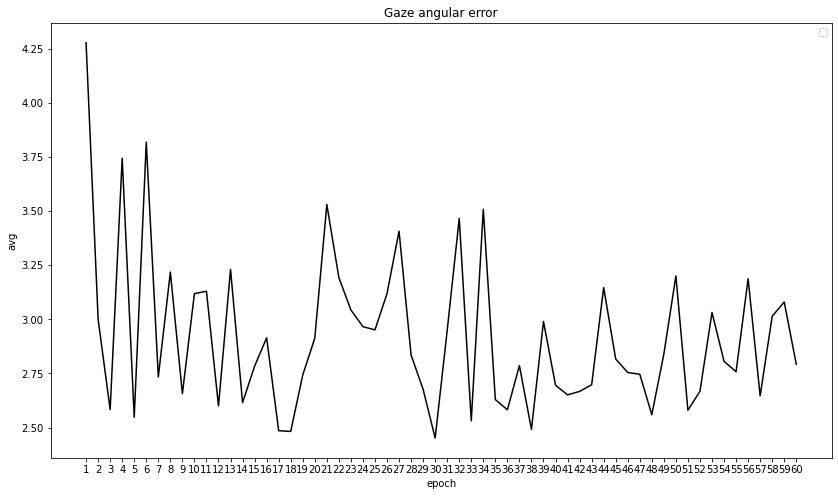

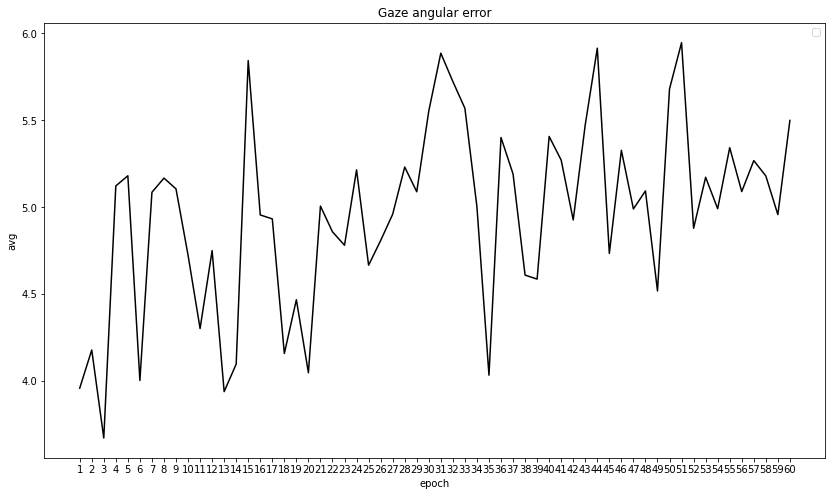

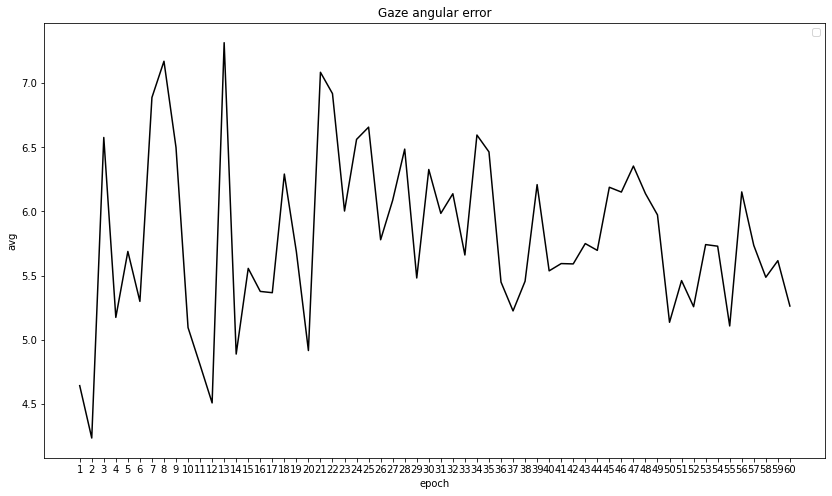

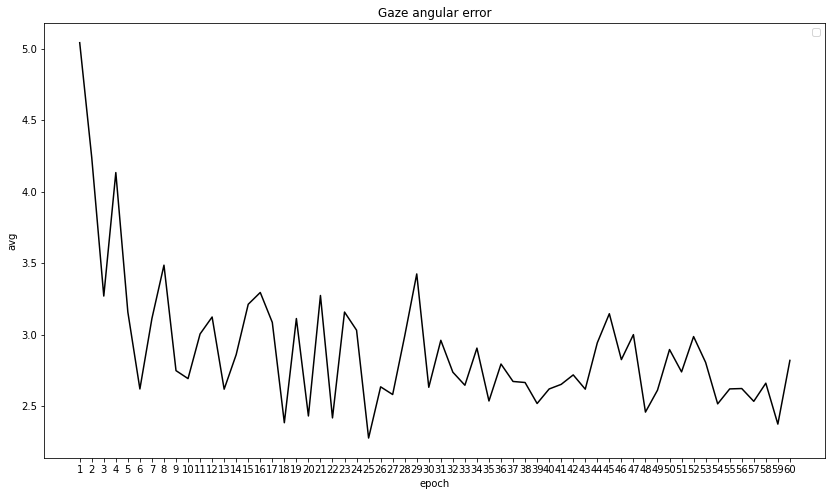

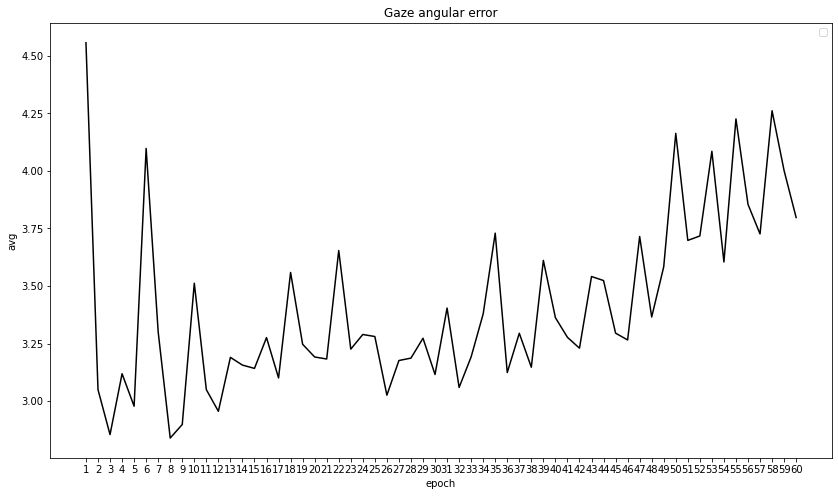

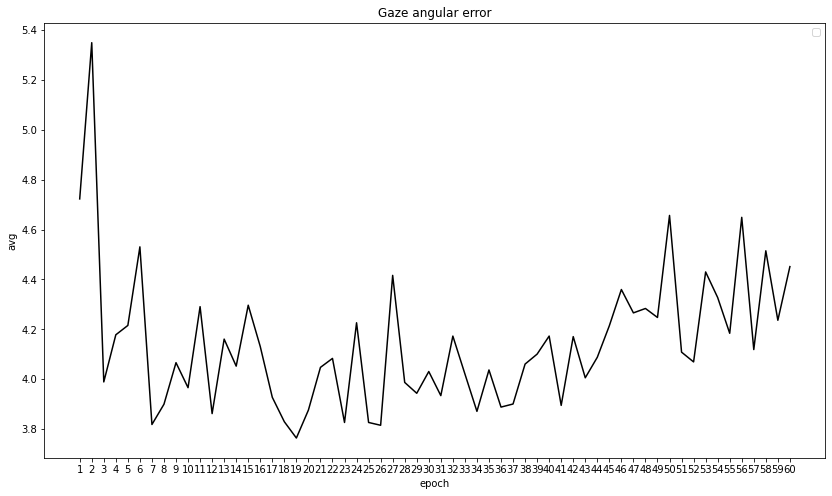

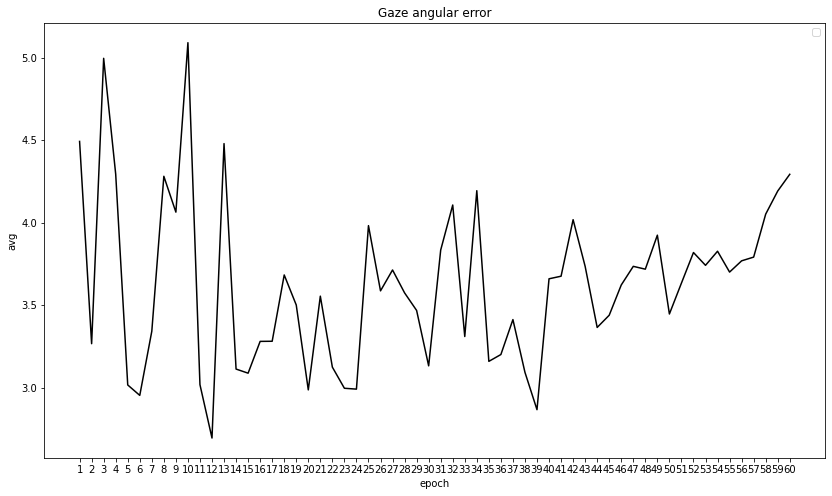

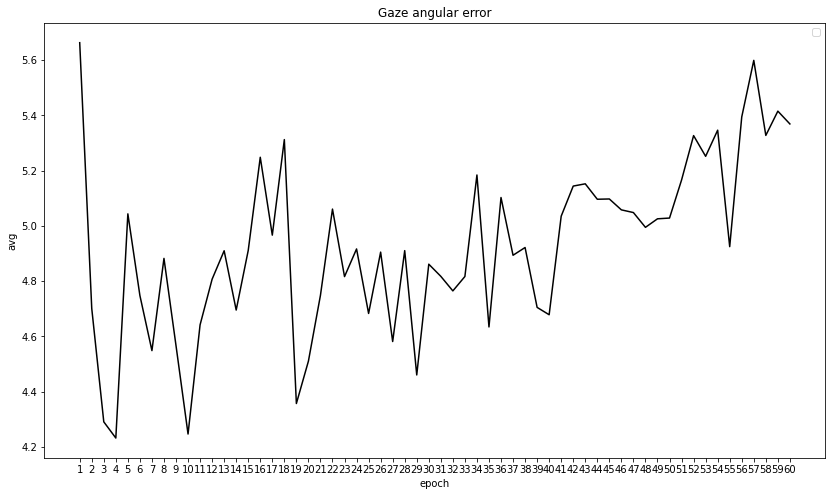

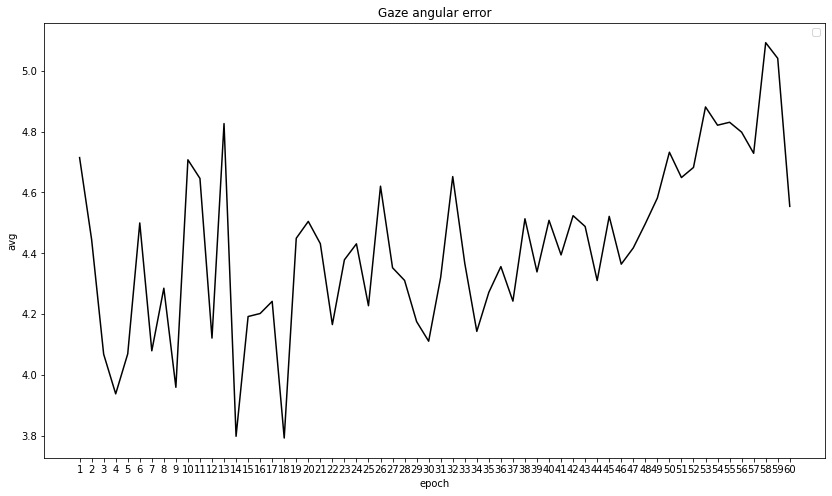

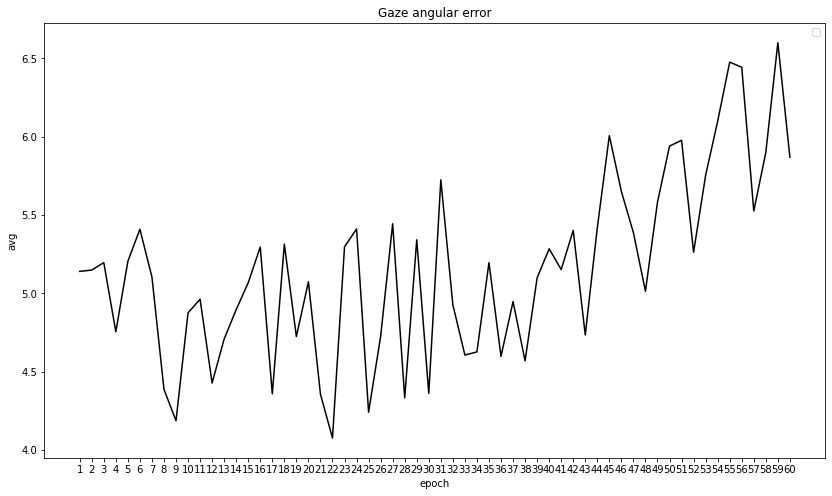

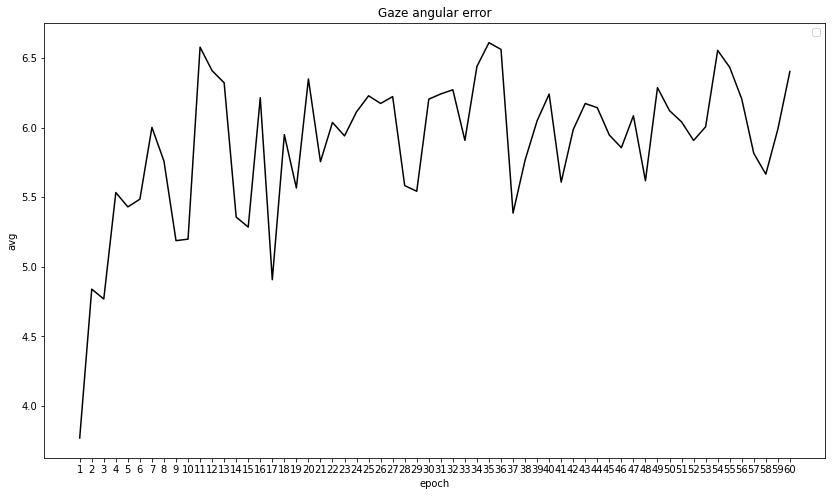

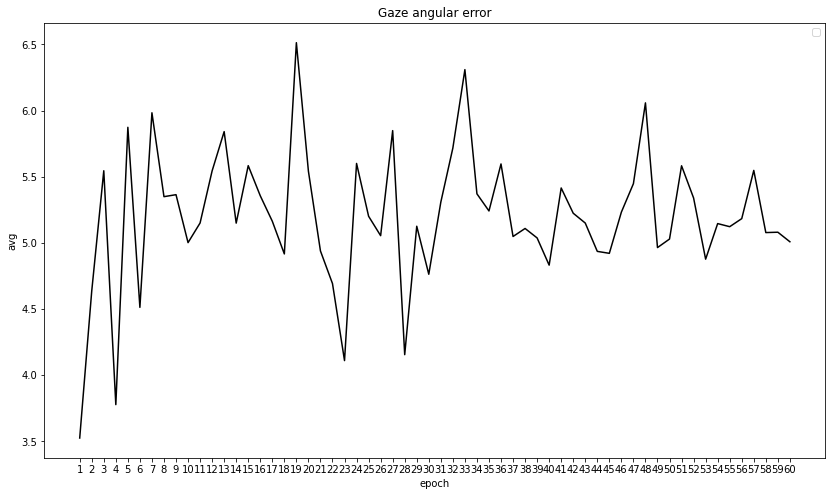

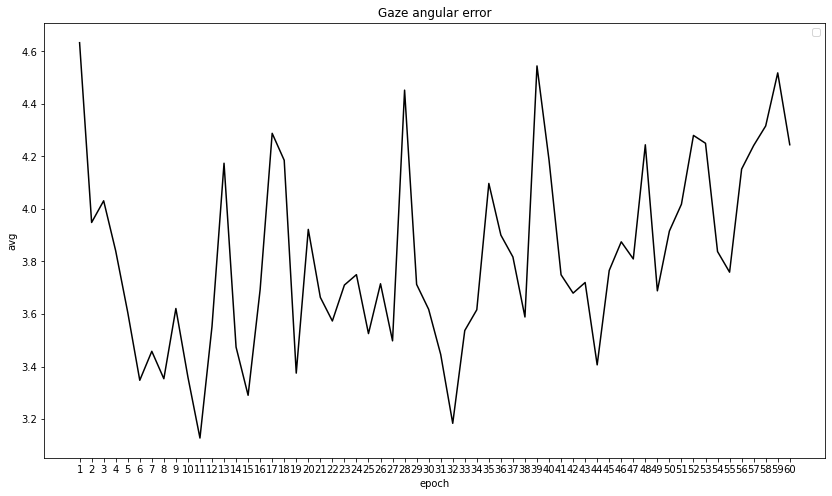

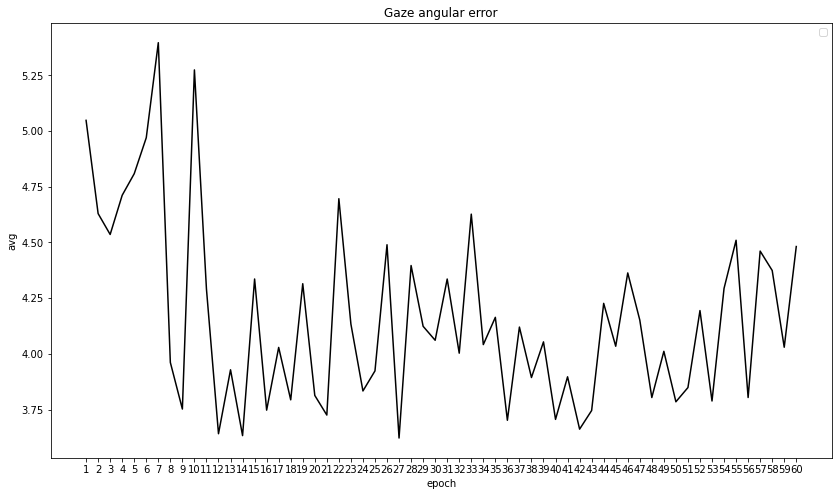

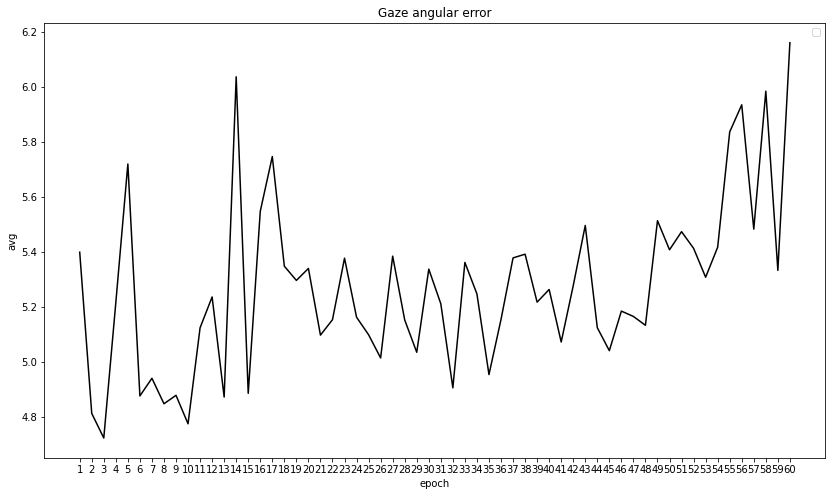

In [10]:
%%time
all_MAE = []
for fold in range(15):
    folder = os.listdir(args.gazeMpiilabel_dir)
    folder.sort()
    testlabelpathcombined = [os.path.join(args.gazeMpiilabel_dir, j) for j in folder] 
    gaze_dataset=datasets.Mpiigaze(testlabelpathcombined,args.gazeMpiimage_dir, transformations, False, angle, fold)

    test_loader = torch.utils.data.DataLoader(
        dataset=gaze_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True)

    fold_path = os.path.join(evalpath, 'fold' + f'{fold:0>2}'+'/')
    print(f"fold_path is {fold_path}")
    if not os.path.exists(fold_path):
        os.makedirs(fold_path)

#     if not os.path.exists(os.path.join(evalpath, f"fold"+str(fold))):
#         os.makedirs(os.path.join(evalpath, f"fold"+str(fold)))

    # list all epochs for testing
    folder = os.listdir(os.path.join(snapshot_path, "fold" + f'{fold:0>2}'))
    folder.sort(key=natural_keys)
    folder.pop(-1)  #remove the tensorboard file
                    

    softmax = nn.Softmax(dim=1)
    with open(os.path.join(evalpath, os.path.join("fold"+f'{fold:0>2}', data_set+".log")), 'w') as outfile:
        configuration = f"\ntest configuration equal gpu_id={gpu}, batch_size={batch_size}, model_arch={arch}\nStart testing dataset={data_set}, fold={fold}---------------------------------------\n"
        print(configuration)
        outfile.write(configuration)
        epoch_list=[]
        avg_MAE=[]
        for epochs in folder: 
            model=model_used
            checkpoint = torch.load(os.path.join(snapshot_path+"fold"+f'{fold:0>2}', epochs))
            saved_state_dict = checkpoint['model_state_dict']
            model= nn.DataParallel(model,device_ids=[0])
            model.load_state_dict(saved_state_dict)
            model.cuda(gpu)
            model.eval()
            total = 0
            idx_tensor = [idx for idx in range(28)]
            idx_tensor = torch.FloatTensor(idx_tensor).cuda(gpu)
            avg_error = .0
            with torch.no_grad():
                for j, (images, labels, cont_labels, name) in enumerate(test_loader):
                    images = Variable(images).cuda(gpu)
                    total += cont_labels.size(0)

                    label_pitch = cont_labels[:,0].float()*np.pi/180
                    label_yaw = cont_labels[:,1].float()*np.pi/180


                    gaze_pitch, gaze_yaw = model(images)

                    # Binned predictions
                    _, pitch_bpred = torch.max(gaze_pitch.data, 1)
                    _, yaw_bpred = torch.max(gaze_yaw.data, 1)


                    # Continuous predictions
                    pitch_predicted = softmax(gaze_pitch)
                    yaw_predicted = softmax(gaze_yaw)

                    # mapping from binned (0 to 28) to angels (-42 to 42)                
                    pitch_predicted = \
                        torch.sum(pitch_predicted * idx_tensor, 1).cpu() * 3 - 42
                    yaw_predicted = \
                        torch.sum(yaw_predicted * idx_tensor, 1).cpu() * 3 - 42


                    pitch_predicted = pitch_predicted*np.pi/180
                    yaw_predicted = yaw_predicted*np.pi/180

                    for p,y,pl,yl in zip(pitch_predicted, yaw_predicted, label_pitch, label_yaw):
                        avg_error += angular(gazeto3d([p,y]), gazeto3d([pl,yl]))


            x = ''.join(filter(lambda i: i.isdigit(), epochs))
            epoch_list.append(x)
            avg_MAE.append(avg_error/ total)
            loger = f"[{epochs}---{args.dataset}] Total Num:{total},MAE:{avg_error/total} \n"
            outfile.write(loger)
            print(loger)
            
    all_MAE.append[ave_MAE]
    
    fig = plt.figure(figsize=(14, 8))        
    plt.xlabel('epoch')
    plt.ylabel('avg')
    plt.title('Gaze angular error')
    plt.legend()
    plt.plot(epoch_list, avg_MAE, color='k', label='mae')
    fig.savefig(os.path.join(evalpath, os.path.join("fold"+f'{fold:0>2}', data_set+".png")), format='png')
    # plt.show()


           

In [ ]:
2900/60